<a href="https://colab.research.google.com/github/pnishanth654/Bharath-Intern/blob/main/SMS%20Spam%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import nltk

In [3]:
sms=pd.read_csv('spam.csv', encoding='latin-1')
sms.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or Â£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...


In [6]:
sms=sms.rename(columns={"type":"label","text":"text"})
sms.head()

,label,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or Â£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...


In [7]:
print(" no of rows", len(sms))

 no of rows 5559


In [8]:
sms.label.value_counts()

ham     4812
spam     747
Name: label, dtype: int64

In [9]:
sms.describe()

,label,text
count,5559,5559
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4812,30


In [10]:
sms['length']=sms['text'].apply(len)
sms.head()

,label,text,length
0,ham,Hope you are having a good week. Just checking in,49
1,ham,K..give back my thanks.,23
2,ham,Am also doing in cbe only. But have to pay.,43
3,spam,"complimentary 4 STAR Ibiza Holiday or Â£10,000...",150
4,spam,okmail: Dear Dave this is your final notice to...,161


<Axes: ylabel='Frequency'>

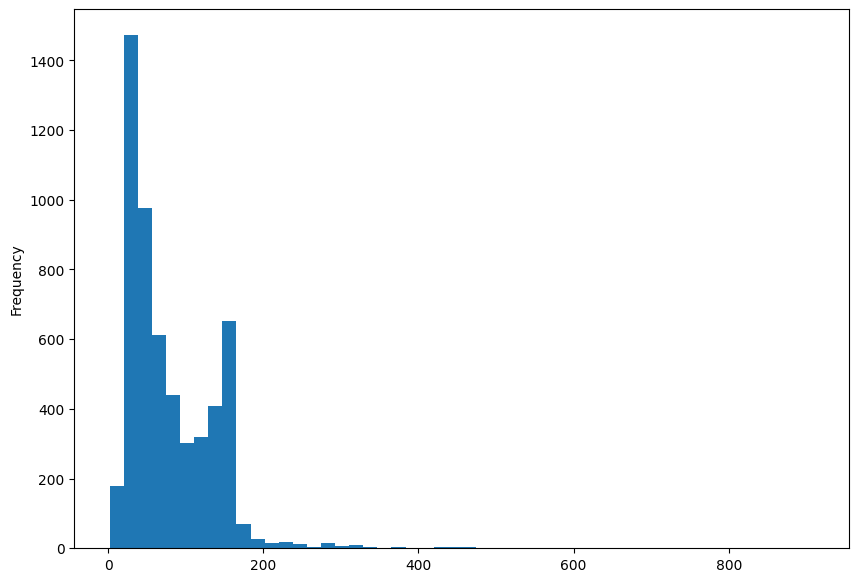

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sms['length'].plot(bins=50, kind='hist',figsize=(10,7))

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

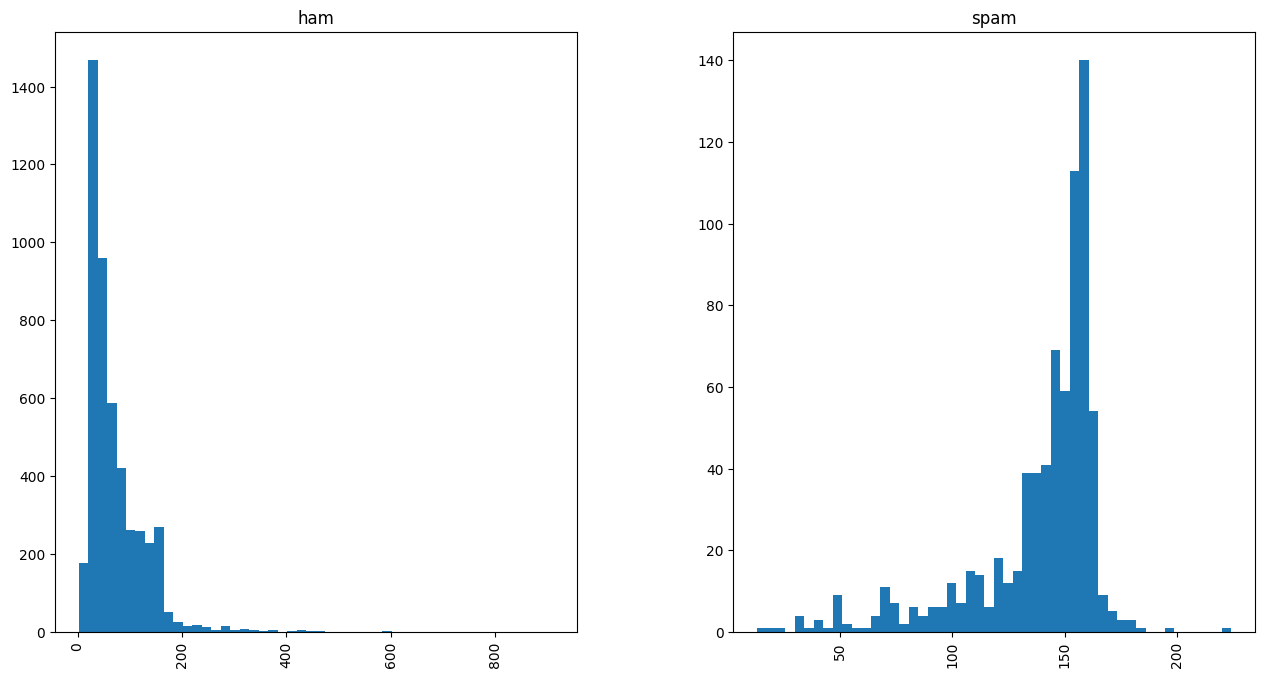

In [12]:
sms.hist(column='length', by='label', bins=50, figsize=(15,8))

In [13]:
sms.loc[:,'label']=sms.label.map({'ham':0, 'spam':1})
sms.head()

<ipython-input-13-2d476ed5f859>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sms.loc[:,'label']=sms.label.map({'ham':0, 'spam':1})


,label,text,length
0,0,Hope you are having a good week. Just checking in,49
1,0,K..give back my thanks.,23
2,0,Am also doing in cbe only. But have to pay.,43
3,1,"complimentary 4 STAR Ibiza Holiday or Â£10,000...",150
4,1,okmail: Dear Dave this is your final notice to...,161


In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count=CountVectorizer()
input=['REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode']

text=count.fit_transform(sms['text'],input)

x_train, x_test, y_train, y_test= train_test_split(text, sms['label'], test_size=0.20, random_state=1)
text

<5559x8699 sparse matrix of type '<class 'numpy.int64'>'
	with 73337 stored elements in Compressed Sparse Row format>

In [48]:
print(x_train.shape)
print(x_test.shape)

input=text[::]

(4447, 8699)
(1112, 8699)


In [17]:
from sklearn.neural_network import MLPClassifier

model=MLPClassifier()
model.fit(x_train, y_train)

MLPClassifier()

In [18]:
prediction=model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Multinomial NB
Accuracy score: 0.9838129496402878
Precision score: 0.9928057553956835
Recall score: 0.8903225806451613
F1 score: 0.9387755102040817


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Bernoulli NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Bernoulli NB
Accuracy score: 0.9838129496402878
Precision score: 0.9928057553956835
Recall score: 0.8903225806451613
F1 score: 0.9387755102040817


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("MLP Classifier")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

MLP Classifier
Accuracy score: 0.9838129496402878
Precision score: 0.9928057553956835
Recall score: 0.8903225806451613
F1 score: 0.9387755102040817


In [36]:
input

<1x8702 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [49]:
model.predict(input)

array([0, 0, 0, ..., 1, 1, 0])

In [39]:
data=sms['text']
input="To get 2.50 pounds free call credit and details of great offers pls reply 2 this text"

In [40]:
data

0       Hope you are having a good week. Just checking in
1                                 K..give back my thanks.
2             Am also doing in cbe only. But have to pay.
3       complimentary 4 STAR Ibiza Holiday or Â£10,000...
4       okmail: Dear Dave this is your final notice to...
                              ...                        
5554    You are a great role model. You are giving so ...
5555    Awesome, I remember the last time we got someb...
5556    If you don't, your prize will go to another cu...
5557    SMS. ac JSco: Energy is high, but u may not kn...
5558                      Shall call now dear having food
Name: text, Length: 5559, dtype: object

In [41]:
data.loc[len(data.index)]="hfwe ewfjb in jd eif"

In [42]:
data

0       Hope you are having a good week. Just checking in
1                                 K..give back my thanks.
2             Am also doing in cbe only. But have to pay.
3       complimentary 4 STAR Ibiza Holiday or Â£10,000...
4       okmail: Dear Dave this is your final notice to...
                              ...                        
5555    Awesome, I remember the last time we got someb...
5556    If you don't, your prize will go to another cu...
5557    SMS. ac JSco: Energy is high, but u may not kn...
5558                      Shall call now dear having food
5559                                 hfwe ewfjb in jd eif
Name: text, Length: 5560, dtype: object

In [43]:
text=count.fit_transform(data)

In [29]:
data.loc[len(data.index)]="hfwe ewfjb in jd eif"

In [30]:
data

0       Hope you are having a good week. Just checking in
1                                 K..give back my thanks.
2             Am also doing in cbe only. But have to pay.
3       complimentary 4 STAR Ibiza Holiday or Â£10,000...
4       okmail: Dear Dave this is your final notice to...
                              ...                        
5556    If you don't, your prize will go to another cu...
5557    SMS. ac JSco: Energy is high, but u may not kn...
5558                      Shall call now dear having food
5559                                 hfwe ewfjb in jd eif
5560                                 hfwe ewfjb in jd eif
Name: text, Length: 5561, dtype: object

In [31]:
text=count.fit_transform(data)

In [32]:
text

<5561x8702 sparse matrix of type '<class 'numpy.int64'>'
	with 73347 stored elements in Compressed Sparse Row format>

In [46]:
input=text[5559]

In [50]:
model.predict(input)

array([0, 0, 0, ..., 1, 1, 0])